# 파이토치로 구현하는 ANN

## 3.1 텐서와 Autograd


### 3.1.1 텐서 차원 다루기

In [1]:
import torch

In [2]:
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


각 괄호마다 들어있는 리스트수를 순서대로 쓰면 차원이 되는듯<br/>
ex) 위의 차원은 (3,3)

In [3]:
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [4]:
# 랭크 늘리기
x = torch.unsqueeze(x, 0)  # 0번째 자리에 차원값 추가
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
랭크(차원): 3


In [5]:
# 랭크 줄이기
x = torch.squeeze(x) # 크기가 1인 랭크를 삭제
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


view() 함수는 위의 작업을 쉽게 할 수 있을 뿐 아니라, 직접 텐서의 모양도 바꿀 수 있음.

In [6]:
x = x.view(9)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size: torch.Size([9])
Shape: torch.Size([9])
랭크(차원): 1


In [7]:
x.view(3,3,1)

tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]])

squeeze, unsqueeze, view 함수는 텐서의 원소 수를 그대로 유지하면서 모양과 차원을 조절.

In [8]:
try:
    x = x.view(2,4)
except Exception as e:
    print(e) # 에러 출력

shape '[2, 4]' is invalid for input of size 9


전체 코드 겸 연습

In [9]:
l = [1,2,3,4,5,6,7,8,9,10,11,12]
x = torch.tensor(l)
x

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [10]:
x_un = x.unsqueeze(0)
print(x_un)
print(x_un.size())

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])
torch.Size([1, 12])


In [11]:
x_un.squeeze()

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [12]:
x_v = x.view(3,4)
print(x_v)
print(x_v.size())

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
torch.Size([3, 4])


In [13]:
x_v.transpose(0, 1)

tensor([[ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11],
        [ 4,  8, 12]])

### 3.1.2 텐서 연산과 행렬곱


In [14]:
w = torch.randn(5, 3, dtype=torch.float)  # 정규분포에서 무작위 값을 뽑아 텐서를 생성하는 함수
x = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
print("w size:", w.size())
print("x size:", x.size())
print("w:", w)
print("x", x)

w size: torch.Size([5, 3])
x size: torch.Size([3, 2])
w: tensor([[-0.2344, -1.2609,  0.5730],
        [ 0.5436, -0.7369,  1.0496],
        [ 0.7185,  0.4224, -1.1812],
        [ 0.5726, -0.4863, -1.3961],
        [ 0.6096,  0.3474, -1.0233]])
x tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [15]:
b = torch.randn(5, 2, dtype=torch.float)
print("b size:", b.size())
print("b:", b)

b size: torch.Size([5, 2])
b: tensor([[-0.0399, -0.7615],
        [ 0.5513,  2.0475],
        [-0.4260,  0.0362],
        [ 0.4055,  0.2525],
        [ 0.8167, -1.5563]])


행렬곱은 torch.mm() 함수 (matrix multiplication)

In [16]:
wx = torch.mm(w, x) # w의 행은 5, x의 열은 2, 즉 shape는 [5 2]
print("wx size:", wx.size())
print("wx:", wx)

wx size: torch.Size([5, 2])
wx: tensor([[-1.1524, -2.0748],
        [ 3.5807,  4.4369],
        [-3.9203, -3.9606],
        [-7.8669, -9.1768],
        [-3.4646, -3.5309]])


In [17]:
result = wx + b
print("result size:", result.size())
print("result:", result)

result size: torch.Size([5, 2])
result: tensor([[-1.1923, -2.8362],
        [ 4.1320,  6.4845],
        [-4.3463, -3.9244],
        [-7.4615, -8.9242],
        [-2.6479, -5.0872]])


전체 코드 겸 연습

In [18]:
w = torch.randn(120, 15, dtype=float)
x = torch.rand(15, 10, dtype=float)

b = torch.randn(120, 10, dtype=float)

result = torch.mm(w, x) + b

print(result.size())
print(result)

torch.Size([120, 10])
tensor([[ 2.2124, -1.7332,  0.9568,  ..., -1.4519,  0.8921, -1.4654],
        [ 1.4060,  1.9505, -2.5980,  ...,  1.8833,  1.5086,  0.3678],
        [-0.0343, -0.8286,  1.2469,  ...,  0.5871,  2.0480, -0.1312],
        ...,
        [ 0.5843, -2.9284, -2.0367,  ..., -1.1375,  0.8911, -1.0600],
        [-2.9615, -3.3572, -2.3669,  ..., -1.3347, -0.9993, -2.7688],
        [-0.3220,  1.3744,  1.3211,  ...,  1.8804, -0.8866,  2.1270]],
       dtype=torch.float64)


In [19]:
result.view(40, 30).size()

torch.Size([40, 30])

### 텐서 랜덤 생성 함수
     랜덤한 값을 가지는 텐서 생성

    1. torch.rand() : 0과 1 사이의 숫자를 균등하게 생성
    2. torch.rand_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의
    3. torch.randn() : 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성
    4. torch.randn_like() :  사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의
    5. torch.randint() : 주어진 범위 내의 정수를 균등하게 생성, 자료형은 torch.float32
    6. torch.randint_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의
    7. torch.randperm() : 주어진 범위 내의 정수를 랜덤하게 생성

### 3.1.3 Autograd

tensor생성 시 requires_grad=True로 설정하면 tensor에 대한 미분값을 w.grad에 저장

In [20]:
w = torch.tensor(1.0, requires_grad=True)

In [21]:
w.size() # 스칼라 텐서

torch.Size([])

In [22]:
a = w*3

In [23]:
l = a**2

In [24]:
l.backward()
print(f"l을 w로 미분한 값은 {w.grad}")

l을 w로 미분한 값은 18.0


## 3.2 경사하강법으로 이미지 복원하기

### 3.2.3 오염된 이미지 문제 해결 및 코드 구현

In [25]:
import sys, os
from google.colab import drive
import pickle
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Mounted at /content/drive


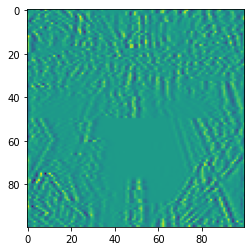

In [26]:
# [100, 100] 형태로 바꾼 후 시각화
broken_image = torch.FloatTensor(pickle.load(open('/content/drive/MyDrive/3-min-pytorch/3-min-pytorch-master/03-파이토치로_구현하는_ANN/broken_image_t.p', 'rb'), encoding='latin1'))

plt.imshow(broken_image.view(100, 100))

In [27]:
# 오염시키는 함수
def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat((zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0)
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
    return h

In [28]:
# 오차함수
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)  # p값을 주면 p-Norm을 반환

In [29]:
random_tensor = torch.randn(10000, dtype = torch.float)

In [30]:
# learning rate
lr = 0.8

Loss at 0 = 12.18910026550293
Loss at 1000 = 1.1003068685531616
Loss at 2000 = 0.5323885083198547
Loss at 3000 = 0.3717097043991089
Loss at 4000 = 0.29408398270606995
Loss at 5000 = 0.24619966745376587
Loss at 6000 = 0.21169576048851013
Loss at 7000 = 0.1842900961637497
Loss at 8000 = 0.1610923409461975
Loss at 9000 = 0.14058499038219452
Loss at 10000 = 0.12189307808876038
Loss at 11000 = 0.10447564721107483
Loss at 12000 = 0.0879802480340004
Loss at 13000 = 0.07216941565275192
Loss at 14000 = 0.05688069388270378
Loss at 15000 = 0.04200252145528793
Loss at 16000 = 0.027459416538476944
Loss at 17000 = 0.021157974377274513
Loss at 18000 = 0.021166330203413963
Loss at 19000 = 0.021167663857340813


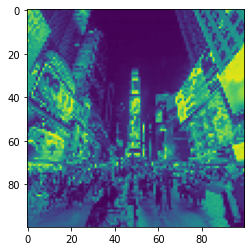

In [31]:
# random_tensor.requires_grad_(True)

for i in range(0, 20000):
    random_tensor.requires_grad_(True)

    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()

    with torch.no_grad():
        random_tensor = random_tensor - lr * random_tensor.grad  # 왜 -=을 사용하면 손실이 감소 안함? 텐서라 그런가

    if i % 1000 == 0:
        print(f'Loss at {i} = {loss.item()}')

plt.imshow(random_tensor.view(100, 100).data)

In [32]:
loss

tensor(0.0212, grad_fn=<DistBackward0>)

### 전체 코드 및 연습

Loss at 0 = 12.21770191192627
Loss at 1000 = 1.124295949935913
Loss at 2000 = 0.5427199602127075
Loss at 3000 = 0.37433406710624695
Loss at 4000 = 0.29376909136772156
Loss at 5000 = 0.2449946254491806
Loss at 6000 = 0.21055851876735687
Loss at 7000 = 0.18351855874061584
Loss at 8000 = 0.16068993508815765
Loss at 9000 = 0.14046689867973328
Loss at 10000 = 0.12196820974349976
Loss at 11000 = 0.10467162728309631
Loss at 12000 = 0.08824612945318222
Loss at 13000 = 0.07247130572795868
Loss at 14000 = 0.05719617381691933
Loss at 15000 = 0.042315367609262466
Loss at 16000 = 0.02775753289461136
Break Loss at 16402 = 0.021985765546560287


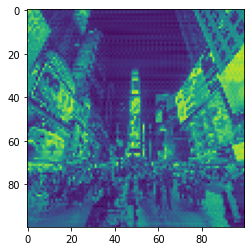

In [33]:
broken_image = torch.FloatTensor(pickle.load(open('/content/drive/MyDrive/3-min-pytorch/3-min-pytorch-master/03-파이토치로_구현하는_ANN/broken_image_t.p', 'rb'), encoding='latin1'))

plt.imshow(broken_image.view(100,100))

def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

random_tensor = torch.randn(10000, dtype=torch.float) # 초기값 설정
lr = 0.8 # learning rate

for i in range(0, 20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr * random_tensor.grad
    if i % 1000 == 0:
        print(f'Loss at {i} = {loss.item()}')
    if loss.item() < 0.022:
        print(f'Break Loss at {i} = {loss.item()}')
        break

plt.imshow(random_tensor.view(100,100).data)

특정 loss를 달성하면 멈추도록 설정해봤음

inference나 validation 과정에서는 기울기를 사용하지 않기 때문에 no_grad() 함수를 통해서 <br/>
기울기를 구하는데 드는 비용을 아낀다.

## 3.3 신경망 모델 구현하기

### 3.2.2 간단한 분류 모델 구현하기

In [34]:
# 라이브러리 임포트
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [35]:
# make datasets
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim,
                              centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                              shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim,
                            centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                            shuffle=True, cluster_std=0.3)

In [36]:
# target값 두개로 만듬
def label_map(y_, from_, to_):
    y = np.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

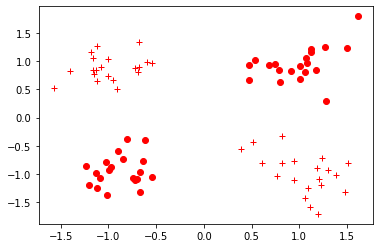

In [37]:
# 시각화
def vis_data(x, y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x, y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor='none',
                     markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

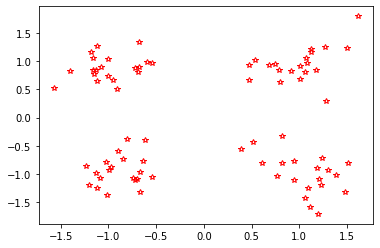

In [38]:
plt.figure()
vis_data(x_train, c='r')
plt.show()

In [39]:
# 넘파이 벡터 형식 데이터, 파이토치 텐서로 변경
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

신경망은 신경망모듈인 torch.nn.Module을 상속 받아서 만듬

In [43]:
class NeuralNet(torch.nn.Module):
    # 생성자
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size

        # 연산 정의
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size) # 행렬곱과 편향을 포함
        self.relu = torch.nn.ReLU()                                        # 나중에 함수로 사용할 수도 있음
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()

    # 순전파
    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [44]:
# 신경망 객체 생성
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss() # 이진 교차 엔트로피를 오차함수로 사용

In [45]:
epochs = 2000

In [46]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

학습하지 않은 모델 성능 시험

In [52]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print(f"Before Training, test loss is {test_loss_before.item()}")

Before Training, test loss is 0.6871267557144165


In [55]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # 결과값 계산
    train_output = model(x_train)
    
    train_loss = criterion(train_output.squeeze(), y_train)

    if epoch % 100 == 0:
        print(f"Train loss at {epoch} is {train_loss.item()}")
    
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.6870448589324951
Train loss at 100 is 0.5754646062850952
Train loss at 200 is 0.42386293411254883
Train loss at 300 is 0.2802515923976898
Train loss at 400 is 0.1876291036605835
Train loss at 500 is 0.1340741366147995
Train loss at 600 is 0.10149012506008148
Train loss at 700 is 0.08041109889745712
Train loss at 800 is 0.06595350801944733
Train loss at 900 is 0.05552154779434204
Train loss at 1000 is 0.04771113023161888
Train loss at 1100 is 0.04168529808521271
Train loss at 1200 is 0.03691132366657257
Train loss at 1300 is 0.033049486577510834
Train loss at 1400 is 0.02988574467599392
Train loss at 1500 is 0.027239829301834106
Train loss at 1600 is 0.024996595457196236
Train loss at 1700 is 0.023072687909007072
Train loss at 1800 is 0.02140595205128193
Train loss at 1900 is 0.019949328154325485


In [56]:
# 모델 평가
model.eval()
test_loss = criterion(model(x_test).squeeze(), y_test)
print(f"After Training, test loss is {test_loss.item()}")

After Training, test loss is 0.009264270775020123


모델 파라미터 저장

In [57]:
torch.save(model.state_dict(), './model.pt')
print(f'state_dict format of the model: {model.state_dict()}')

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[-1.4741, -1.5917],
        [ 1.1802, -1.1749],
        [ 1.3884,  1.4700],
        [-1.5884,  1.5942],
        [ 0.9485, -1.0182]])), ('linear_1.bias', tensor([-0.0356, -0.0784,  0.0884, -0.1726,  0.0419])), ('linear_2.weight', tensor([[-1.9506,  1.4626, -1.9245,  2.0659,  1.2879]])), ('linear_2.bias', tensor([-0.0829]))])


가중치 가져와서 적용

In [59]:
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))

<All keys matched successfully>

In [60]:
new_model.eval()
print(f"벡터 [-1, 1]이 레이블 1을 가질 확률은 {new_model(torch.FloatTensor([-1,1])).item()}")

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9970075488090515


전체 코드 및 연습

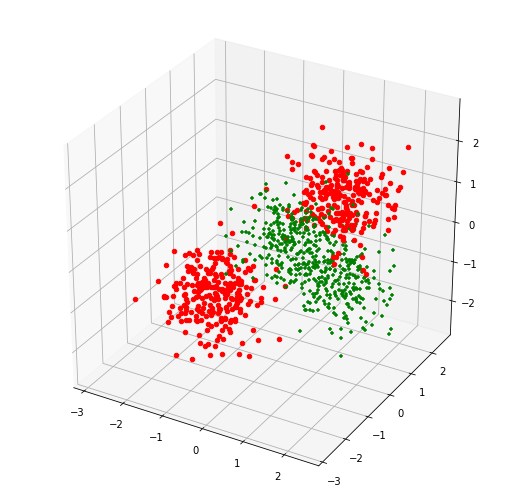

In [73]:
n_dim = 3
center = [[1,1,1], [-1,-1,-1], [1,1,-1], [1,-1,1]]

x_train, y_train = make_blobs(n_samples=1000, n_features=n_dim,
                              centers=center, shuffle=True, cluster_std=0.5)
x_test, y_test = make_blobs(n_samples=300, n_features=n_dim,
                            centers=center, shuffle=True, cluster_std=0.5)

def label_map(y_, from_, to_):
    y = np.copy(y_)
    for f in from_:
        y[y_==f] = to_
    return y

y_train = label_map(y_train, [0,1], 0)
y_train = label_map(y_train, [2,3], 1)
y_test = label_map(y_test, [0,1], 0)
y_test = label_map(y_test, [2,3], 1)

from mpl_toolkits.mplot3d import Axes3D

def vis_data(x, y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x, y):
        if y_ is None:
            ax.scatter(x_[0], x_[1], x_[2], '*', markerfacecolor='none',
                    markeredgecolor=c)
        else:
            ax.scatter(x_[0], x_[1], x_[2], c=c if y_==0 else 'g', marker='o' if y_ == 0 else '+')

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

vis_data(x_train, y_train, c='r')
plt.show()

In [74]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [80]:
class NeuralNet3(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet3, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [81]:
model = NeuralNet3(3, 5)

learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000

optimizer = torch.optim.SGD(model.parameters(),
                            lr = learning_rate)

In [82]:
# 모델 학습
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    
    if epoch % 100 == 0:
        print(f"Train loss at {epoch} is {train_loss.item()}")
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.6598542332649231
Train loss at 100 is 0.6110396981239319
Train loss at 200 is 0.5664929747581482
Train loss at 300 is 0.5273621082305908
Train loss at 400 is 0.49284490942955017
Train loss at 500 is 0.46116793155670166
Train loss at 600 is 0.4311472773551941
Train loss at 700 is 0.40224722027778625
Train loss at 800 is 0.37377476692199707
Train loss at 900 is 0.3440600633621216
Train loss at 1000 is 0.3120556175708771
Train loss at 1100 is 0.2809324860572815
Train loss at 1200 is 0.25453540682792664
Train loss at 1300 is 0.2330119013786316
Train loss at 1400 is 0.21569426357746124
Train loss at 1500 is 0.20186854898929596
Train loss at 1600 is 0.1908446103334427
Train loss at 1700 is 0.18195055425167084
Train loss at 1800 is 0.1746968924999237
Train loss at 1900 is 0.16867387294769287


In [83]:
model.eval()
test_loss = criterion(model(x_test).squeeze(), y_test)
print(f'After Traning, test loss is {test_loss.item()}')

After Traning, test loss is 0.14197666943073273


In [84]:
torch.save(model.state_dict(), './model3.pt')
print(f"state_dict format of the model: {model.state_dict()}")

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[-0.7505, -0.8034, -0.8000],
        [ 0.9188, -0.8545,  0.6031],
        [ 1.2733,  1.1191,  1.3347],
        [ 0.4750,  0.1566,  0.5005],
        [ 1.2690,  0.3207, -0.3768]])), ('linear_1.bias', tensor([ 0.3668,  0.5418, -0.8014,  0.1245,  1.0222])), ('linear_2.weight', tensor([[-1.3198,  1.2800, -2.2513, -0.2370,  1.6618]])), ('linear_2.bias', tensor([-1.1366]))])


In [86]:
new_model = NeuralNet3(3, 5)
new_model.load_state_dict(torch.load('./model3.pt'))
new_model.eval()
print(f"벡터 [1, 1, -1]이 레이블을 1을 가질 확률은 {new_model(torch.FloatTensor([1,1,-1])).item()}")

벡터 [1, 1, -1]이 레이블을 1을 가질 확률은 0.960693359375
